In [ ]:
%load_ext autoreload
%autoreload 2

# 1. Segmentation in feature space

## 1.1. Generating and visualizing a dataset
We are going to be working with a $nxm$ dataset `X`where each of the $n$ rows corresponds to a sample, and each of the $m$ columns corresponds to a feature. This dataset will also be associated with a $nx1$ vector `Y` which stores the labels of the samples. Here is an example of a two-class problem, with randomly generated 100 samples with 2 features:

```python
import numpy as np
X = np.random.rand(100, 2)
Y = np.concatenate((np.zeros((50,1)), np.ones((50,1))), axis=1)
```

This data is a bit too random for us to experiment with, so you have been provided with a function `generate_gaussian_data()` in `# SECTION 1` of the `segmentation.py` module that generates a more interesting dataset in 2D. Because the data is 2D, we can visualize it as follows:

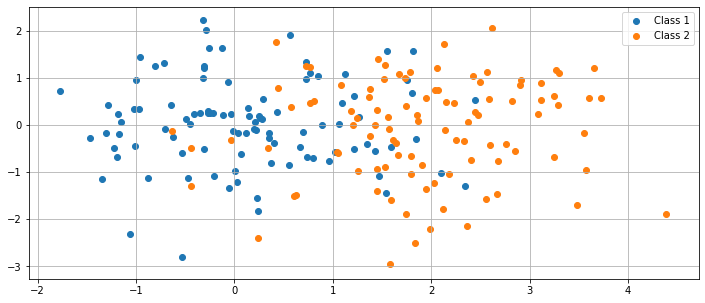

In [12]:
%matplotlib inline
import sys
sys.path.append("../code")
import matplotlib.pyplot as plt
from segmentation import generate_gaussian_data
X, Y = generate_gaussian_data()
fig = plt.figure(figsize=(12,5))
ax1  = fig.add_subplot(111)
im1  = ax1.scatter(X[:100,0], X[:100,1], label='Class 1')
im2  = ax1.scatter(X[100:,0], X[100:,1], label='Class 2')
ax1.grid()
ax1.legend()

Instead of generating data, now we will create this type of dataset from the pixels of an  image. You can use

```python
I = plt.imread('../images/dataset_brains/1_1_t1.tif.tif')
```
to load an image. This is a T1 slice from subject 1, and it is slice 1 in the set we are using. You can view the image with `plt.imshow()`.

Once the image is loaded, the simplest way to create a feature representation is to represent each pixel by its
intensity value. These steps are displayed below:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
I = plt.imread('../../data/dataset_brains/1_1_t1.tif')
fig = plt.figure(figsize=(5,5))
ax1  = fig.add_subplot(111)
ax1.imshow(I)
X = I.flatten().T

Now we also would like to have some labels Y. You can use the provided ground-truth for this. Load the ground-truth and view it with the following code:

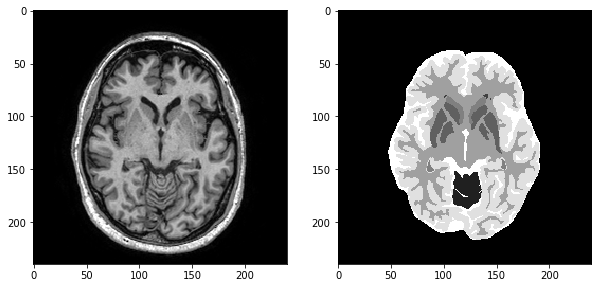

In [3]:
GT = plt.imread('../data/dataset_brains/1_1_gt.tif')
fig = plt.figure(figsize=(10,10))
ax1  = fig.add_subplot(121)
ax1.imshow(I)
ax2  = fig.add_subplot(122)
ax2.imshow(GT)

You will see an image with 9 values. These correspond to the following 9 classes:
- 0 background
- 1 cerebellum
- 2 white matter hyperintensities/lesions
- 3 basal ganglia and thalami
- 4 ventricles
- 5 white matter
- 6 brainstem
- 7 cortical grey matter
- 8 cerebrospinal fluid in the extracerebral space

In this exercise we will only look if a pixel is outside the brain (label 0) or not. Here's
how to use the ground truth image to create these labels:

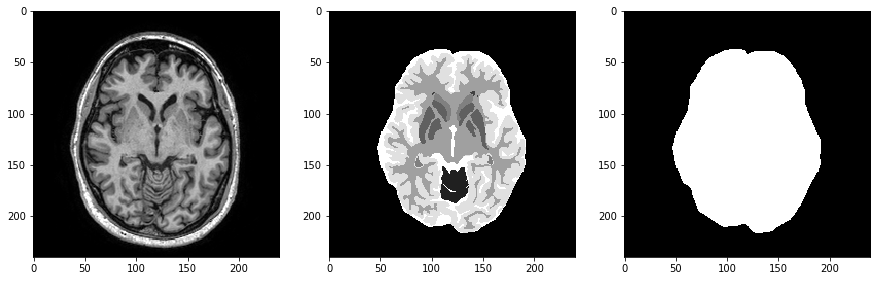

In [4]:
gt_mask = GT>0
fig = plt.figure(figsize=(15,15))
ax1  = fig.add_subplot(131)
ax1.imshow(I)
ax2  = fig.add_subplot(132)
ax2.imshow(GT)
ax3  = fig.add_subplot(133)
ax3.imshow(gt_mask)
Y = gt_mask.flatten()

Now we have a 1D dataset `X` and labels `Y`. Let's create some more features, so we can
visualize them in 2D! Let's take some context into account by blurring the image, for
example as follows:

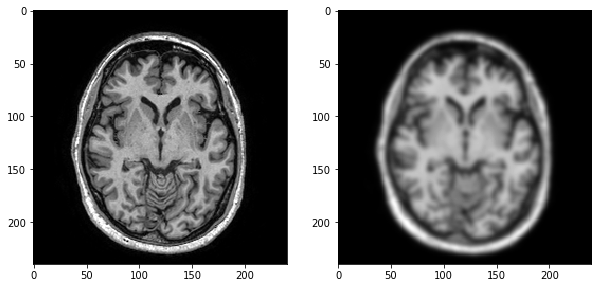

In [5]:
from scipy import ndimage
I_blurred = ndimage.gaussian_filter(I, sigma=2)
fig = plt.figure(figsize=(10,10))
ax1  = fig.add_subplot(121)
ax1.imshow(I)
ax2  = fig.add_subplot(122)
ax2.imshow(I_blurred)

### (A)
### EXERCISE:
Try different parameters of the `ndimage.gaussian_filter()` function, add two or three more features to your dataset, and use the `scatter_data()` function in the `utilities.py` module to visualize the features you added. Note that this function only visualizes at most 1000 pixels to save time, but there are more than 50K pixels in total. You can edit the function if you want to see more or less pixels in the plot. To test your different features, use the `scatter_data_test()` template function that is provided in `# SECTION 1` of the `segmentation_tests.py` module.

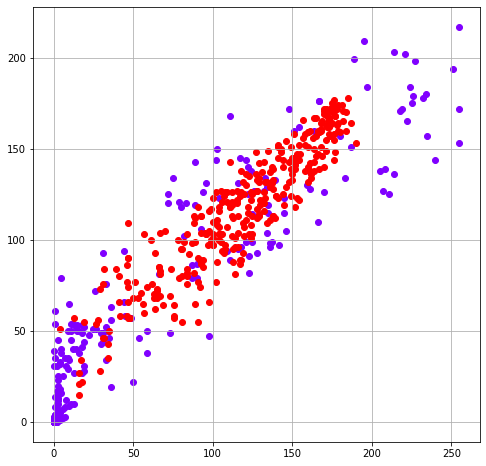

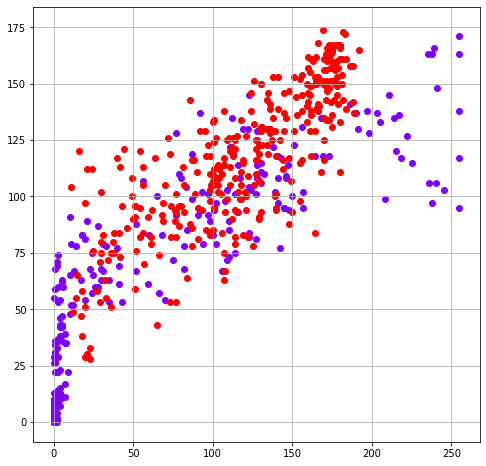

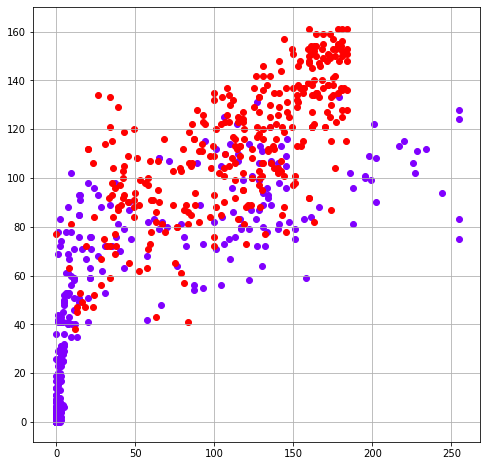

In [14]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import scatter_data_test
X, Y = scatter_data_test()

### QUESTION:
How would you describe the relationship of the intensity and the blurred intensity?

How is this relationship affected when you change the parameter in `ndimage.gaussian_filter()`?

What happens to the two classes of pixels at larger scales of the image and why?

### (B)
### EXERCISE:
Load the corresponding T2 slice (`1_1_t2.tif`), extract the same features from it (i.e. intensity and blurred intensity with the same scales) and examine the scatterplots of the T2 features against each other, and the T2 features against the T1 features (at the same scale).

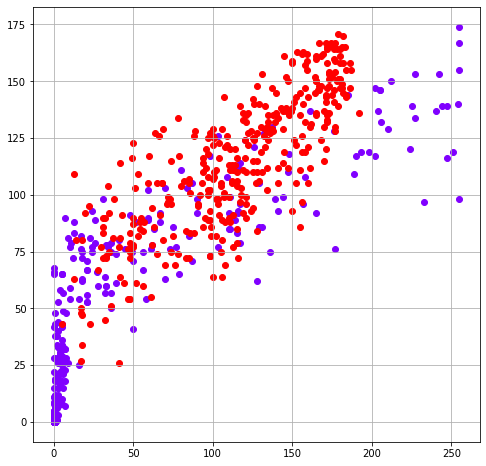

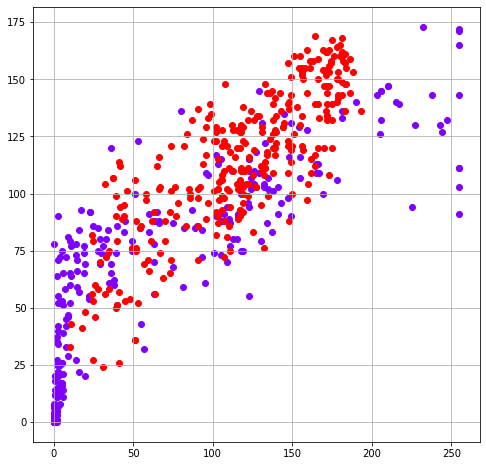

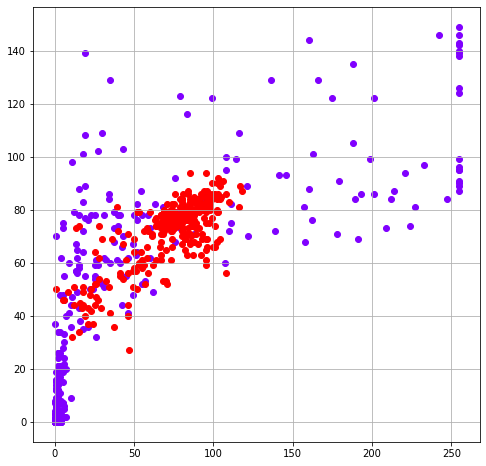

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import scatter_t2_test
X, Y = scatter_t2_test()

### QUESTION:
What can you say about the T2 features? 

How do the T2 features relate to the T1 features?

### (C)
### QUESTION:
Look at the values on the axes of your plots. What happens overall to the values, as the scale increases? Why?

### (D)
You can also add coordinates as features, as follows (note that you can also do this with `np.meshgrid()`):

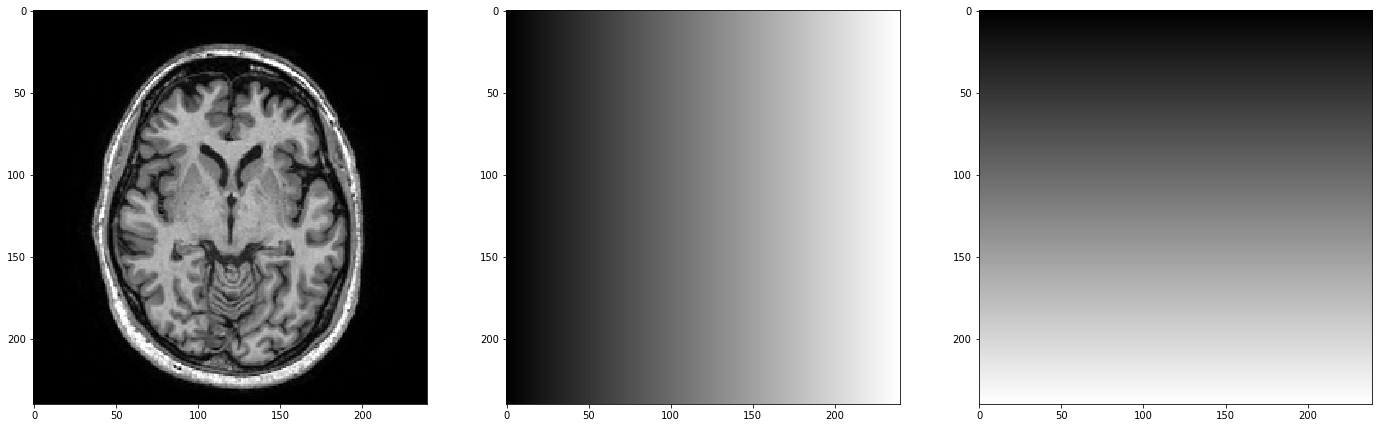

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code")
plt.rcParams['image.cmap'] = 'gray'
I = plt.imread('../data/dataset_brains/1_1_t1.tif')
X1 = I.flatten()
X1 = X1.reshape(-1, 1)
r = np.arange(240).reshape(1,-1)
x_coord = np.tile(r, (240, 1))
r = r.T
y_coord = np.tile(r, (1, 240))
X2 = np.concatenate((X1, x_coord.flatten().reshape(-1,1), y_coord.flatten().reshape(-1,1)), axis=1)
fig = plt.figure(figsize=(24,8))
ax1  = fig.add_subplot(131)
ax1.imshow(X2[:,0].reshape(240,240))
ax2  = fig.add_subplot(132)
ax2.imshow(X2[:,1].reshape(240,240))
ax3  = fig.add_subplot(133)
ax3.imshow(X2[:,2].reshape(240,240))

### EXERCISE:
Instead of adding the coordinates separately, can you think of a feature which combines information from both coordinates, and which would be helpful in deciding whether a pixel is inside the brain or not? Implement this functionality in the template function `extract_coordinate_feature()` that is provided in `# SECTION 1` of the `segmentation.py` module. Test your implementation with the function `extract_coordinate_feature()`. Hint: the image of this feature looks like this:

<img src="../notebooks/assets/informationXandY.png" width="400" height="400" align="center"/>

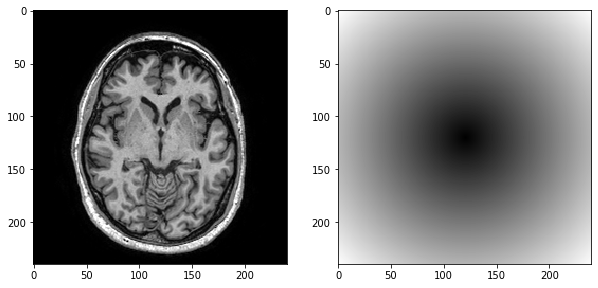

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import extract_coordinate_feature_test
extract_coordinate_feature_test()

## 1.2. Feature scaling

### (A)
### EXERCISE:
Take the dataset `X` where you now have the intensity, some blurred intensities, and the coordinate feature. Look at the distribution of values you have for each feature. You can do this by examining the values on the axes of the scatterplots, or using the functions `mean(X,1)` and `std(X,[],1)` where `X` is your feature dataset. Write your implementation in `feature_stats_test()` in `# SECTION 1` of the `segmentation_tests.py` module.

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import feature_stats_test
feature_stats_test()

X_data            : [T1 intensity, T1 gauss 2, T1 gauss 4, T1 gauss 6, Coordinate]
Mean              : [55.71376736 55.10868056 55.08097222 55.04501736 91.82470613]
Standard deviation: [68.7607908  62.3221859  57.27010084 54.27773713 34.18415828]


### QUESTION:
What can you say about the values in each feature, are they similar or different?

### (B)
### EXERCISE:
To remove such differences, you can normalize each feature to "zero mean, unit variance". You can do this using the `normalize_data()` function that is provided in `# SECTION 1` of the `segmentation.py` module. For each feature, this function subtracts the mean value of that feature, and then divides by the standard deviation. Normalize your brain data and verify the mean and standard deviation values. Write your implementation in `normalized_stats_test()` in `# SECTION 1` of the `segmentation_tests.py` module.

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import normalized_stats_test
normalized_stats_test()

X_data            : [T1 intensity, T1 gauss 2, T1 gauss 4, T1 gauss 6, Coordinate]
Mean              : [-5.06476342e-14  7.29758268e-14  1.05084961e-14  1.07686391e-14
  5.77245273e-14]
Standard deviation: [1. 1. 1. 1. 1.]


### (C)
### EXERCISE:
For this question, practice doing such normalization by hand. You are given this dataset:

|  person | weight (kg)| height (m)|
|---------|------------|-----------|
| Alice | 55 | 1.6 |
| Bob | 60 | 1.7 |
| Carol | 65 | 1.8 |

You need to find the mean and standard deviation for each feature, then calculate the normalized values. For the answer, just provide the normalized values. You can of course calculate these in Python, but you should be able to do this by hand.

<a id='1_3_A'></a>
## 1.3. Distances

To understand k-Means clustering and the nearest neighbour classifier we'll first take a closer look at distances.

### (A)
Generate a simple dataset as follows:

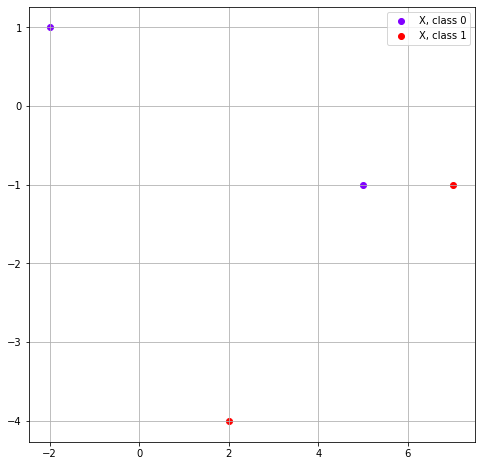

In [2]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../code")
import matplotlib.pyplot as plt
import utilities as util
from segmentation import generate_gaussian_data
X, Y = generate_gaussian_data(2) # Generates 2 samples per Gaussian class
X = np.round(X*3) # Stretch and round the numbers
ax = util.scatter_data(X,Y)
ax.legend()

### EXERCISE:
The numbers should be easy to work with. Get the coordinates of your datapoints by inspecting X, and compute 4x4 pairwise Euclidean distances between these points. You should be able to do such calculations by hand for 2D or 3D points. You can leave the answers as square roots, i.e. $\sqrt{5}$ instead of 2.236... . Use the scatterplot to visually check if the distances you calculated make sense.

### (B)
Now let's compute distances with code. It is possible to create a for-loop to compute all the distances, but it's quicker to do it for the whole matrix with Python package functionality:

```python
D = scipy.spatial.distance.cdist(X, X, metric='euclidean')
```

### EXERCISE:
Generate a larger Gaussian dataset, with 100 samples per class, and compute the distances. `D` now has as many rows as there are samples, so we can see each row as that sample's distances to all the others. Now use `plt.imshow()` to visualize the distance matrix as an image. Write your implementation in `distance_test()` in `# SECTION 1` of the `segmentation_tests.py` module. You should see something like this:



<img src="../notebooks/assets/distance_matrix.png" width="400" height="400" align="center"/>


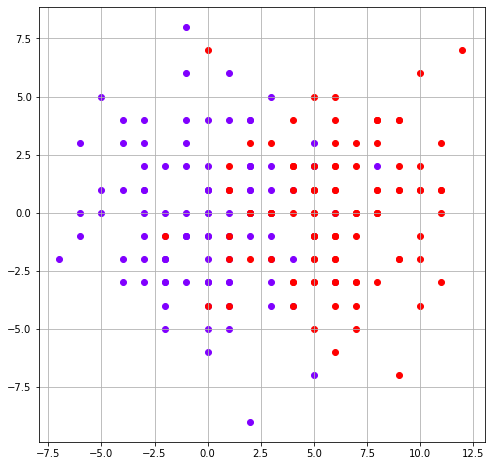

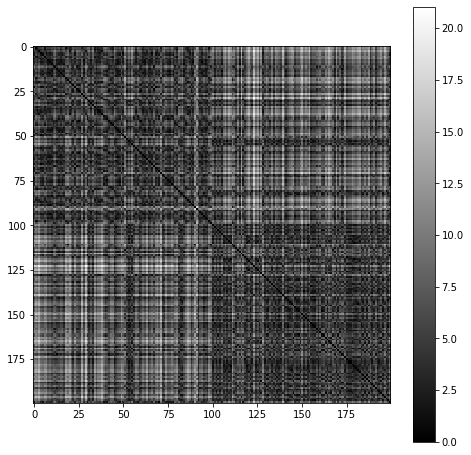

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import distance_test
distance_test()

### QUESTION:
What structure do you see in the image and why? Vary the parameters (means and standard deviations, not the number of samples) of generate gaussian data a bit to confirm your intuition.

### (C)
### EXERCISE:
It is also possible to compute distances to some other samples not in your dataset. First create a dataset with two samples yourself, for example with:

```python
C = np.array([[0,0],[1,1]])
```

Then compute the distances between `X` (from [1.3 (A)](#1_3_A) above) and `C`. Write your implementation in `small_samples_distance_test()` in `# SECTION 1` of the `segmentation_tests.py` module. What happens if you change the order of the inputs?

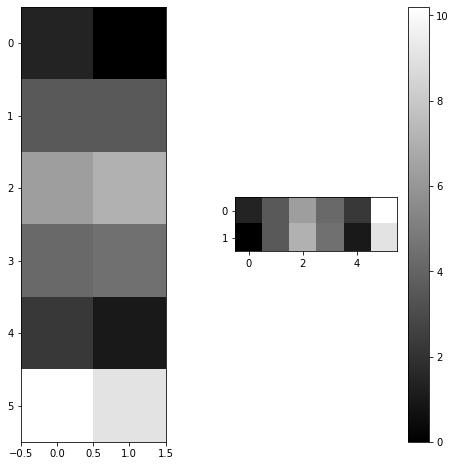

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import small_samples_distance_test
X, Y, C, D = small_samples_distance_test()

### (D)
### EXERCISE:

Now let's use `X` and `C` to figure out which samples in `X` are the closest to the first, or to the second sample. Write your implementation in `minimum_distance_test()` in `# SECTION 1` of the `segmentation_tests.py` module. First plot the datasets on top of each other in different colors and visualize the data. Estimate how many points are going to be closest to each sample in `C`. Now with the distance matrix, you can do the following:

```python
min_index = np.argmin(D, axis=1)
min_dist = D[:,min_index]

```

Look at the values in `min_dist` and `min_index`.

How can you calculate how many samples are closest to each of the samples in `C`?

Distance matrix D:
[[ 1.41421356  0.        ]
 [ 3.60555128  3.60555128]
 [ 6.32455532  7.07106781]
 [ 4.24264069  4.47213595]
 [ 2.23606798  1.        ]
 [10.19803903  9.05538514]]
For each row in D, which column has the minimum value:
[1 0 0 0 1 1]
Minimum distances:
[0.         3.60555128 6.32455532 4.24264069 1.         9.05538514]
Samples in X that are closest to each of the samples in C:
[3. 3.]


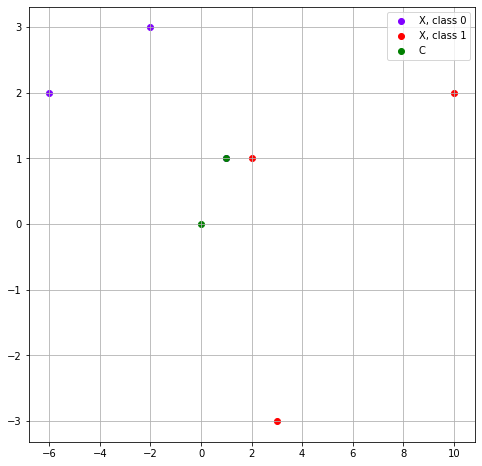

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import minimum_distance_test
minimum_distance_test(X, Y, C, D)


## 1.4. k-Means clustering

### (A)
### EXERCISE:
Generate Gaussian data `test_data` with 100 samples per class. To start the k-Means algorithm, we will first initialize some cluster centers for k-Means to start with. Define the number of clusters, e.g. `num_clusters = 2`. Now select `num_clusters` rows from `X` and store them in `w_initial`. You can verify by plotting the datasets on top of each other in different colors.

Cluster indices: [179  95]
Cluster centers: 
[[ 2.81804118 -1.34223374]
 [-0.70995074  0.28571281]]


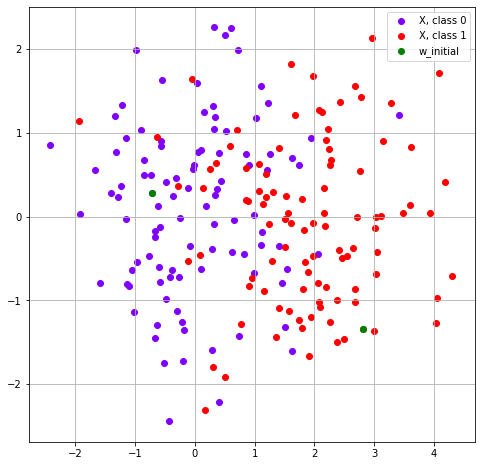

In [23]:
%matplotlib inline
import numpy as np
import scipy
import sys
sys.path.append("../code")
import matplotlib.pyplot as plt
import utilities as util
from segmentation import generate_gaussian_data
N = 100
num_clusters = 2
test_data = generate_gaussian_data(N) # Generates 100 samples per Gaussian class
X, Y = test_data
ax = util.scatter_data(X,Y)
idx = np.random.randint(len(X), size=num_clusters)
w_initial = X[idx,:]
im2  = ax.scatter(w_initial[:,0], w_initial[:,1], color='g', label='w_initial')
plt.legend()
print('Cluster indices: {}'.format(idx))
print('Cluster centers: \n{}'.format(w_initial))

### (B)
### EXERCISE:
Assume these points are the cluster centers for your data. Calculate the minimum distances using the approach from the previous exercise and look at `min_index` to find out which cluster each sample belongs to.

In [25]:
D = scipy.spatial.distance.cdist(X, w_initial, metric='euclidean')
# For each row/sample in D, which column has the minimum value...
# (i.e. to which point in w_initial is this sample the closest)
min_index = np.argmin(D, axis=1)
print('min_index:\n{}'.format(min_index))
# Show these minimum distances in a vector
min_dist = np.empty(*min_index.shape)
for i in np.arange(len(D)):
    min_dist[i] = D[i, min_index[i]]
a = min_dist.dot(min_dist.T)
print(a)
# Calculate how many samples in X are closest to each of the samples in w_initial
b = np.empty(len(w_initial))
for j in np.arange(len(w_initial)):
    b[j] = len(np.where(min_index==j)[0])
print(b)

min_index:
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0]
512.4225230461032
[ 84. 116.]


### (C)
### EXERCISE:
Imagine that your cluster centers, while being randomly selected, were selected in a different order. You could achieve this with `w_initial = np.array([w_initial[1,:], w_initial[0,:]])`. Calculate the cluster assignments again and compare them to the previous result. If you want to use these results for segmentation of an image, what kind of problems do you expect? How could you solve this problem?

In [26]:
w_switched = np.array([w_initial[1,:], w_initial[0,:]])
D = scipy.spatial.distance.cdist(X, w_switched, metric='euclidean')
# For each row/sample in D, which column has the minimum value...
# (i.e. to which point in w_switched is this sample the closest)
min_index = np.argmin(D, axis=1)
print('min_index:\n{}'.format(min_index))
# Show these minimum distances in a vector
min_dist = np.empty(*min_index.shape)
for i in np.arange(len(D)):
    min_dist[i] = D[i, min_index[i]]
a = min_dist.dot(min_dist.T)
print(a)
# Calculate how many samples in X are closest to each of the samples in w_switched
b = np.empty(len(w_initial))
for j in np.arange(len(w_initial)):
    b[j] = len(np.where(min_index==j)[0])
print(b)

min_index:
[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1]
512.4225230461032
[116.  84.]


### (D)
### EXERCISE:
To start optimization, we need to find out how good the current cluster assignment is. Use what you learned in the registration exercises, and in the course slides to complete the missing code in `cost_kmeans()` in `# SECTION 1` of the `segmentation.py` module. You can check that this is working by creating good or bad cluster centers by hand, and then calculating the cost.

### (E)
### EXERCISE:
Now that we have a cost function, we can optimize it with the same method as in the registration exercises. Use the code in `kmeans_demo()` in `# SECTION 1` of the `segmentation_tests.py` module to see the final algorithm in action. What do you notice about the updates and the cost curve?

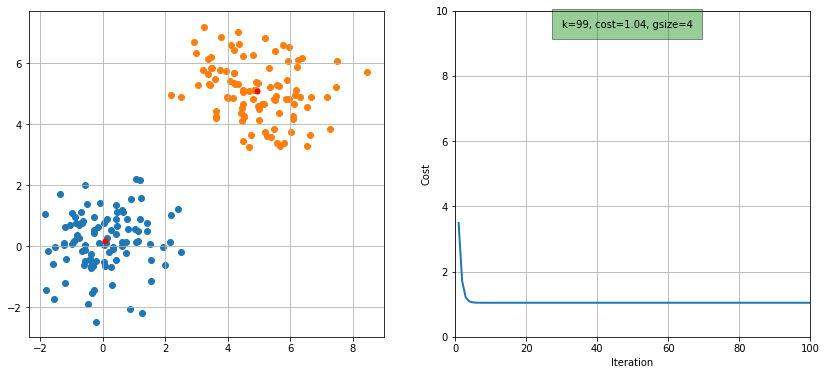

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import kmeans_demo, funX
from IPython.display import display, clear_output
        
kmeans_cost = kmeans_demo()

### (F)
### EXERCISE:
Now fill in the missing parts of code (parts of answers to previous questions) in `kmeans_clustering()` in `# SECTION 1` of the `segmentation.py` module.

### (G)
### EXERCISE:
Load a slice for the brain/non-brain task. Normalize the data and apply the clustering classifier to it. Visualize the results. Implement all of this in the `kmeans_clustering_test()` script in `# SECTION 1` of the `segmentation_tests.py` module. Depending on the features you use, you could see something like this:

<img src="../notebooks/assets/kmeans_example.png" width="800" align="center"/>


Dice coefficient:
0.8428856245846414


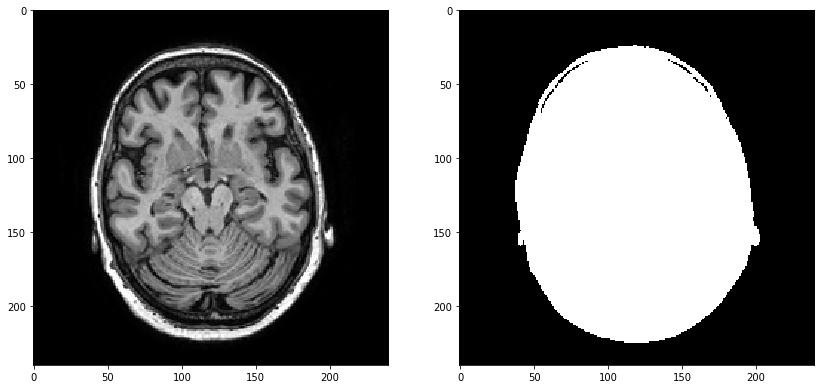

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import kmeans_clustering_test

kmeans_clustering_test()

## 1.5. Nearest neighbour classifier

### (A)
### QUESTION:
First compute the (square) distance matrix between all samples in your Gaussian dataset. Find the minimum distances min dist and the indices of the corresponding columns min index as before. Can you already predict what values will be returned and why?

### (B)
### EXERCISE:
To make things a bit more exciting, generate two separate, small Gaussian datasets with different number of samples, but other than that the same parameters:

```python
train_data, train labels = generate_gaussian_data(2);
test_data, test labels = generate_gaussian_data(1); 
```

Classify the points in `test_data`, based on their distances `d` to the points in `train_data`. Write your implementation in `distance_classification_test()` in `# SECTION 1` of the `segmentation_tests.py` module.

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import distance_classification_test
distance_classification_test()

Train data:
[[-1.37544726 -0.20147185]
 [ 1.37532175  0.35018996]
 [ 0.81132805  0.94599886]
 [ 1.16570124 -0.02923361]]
Test data:
[[-0.6531948  -0.61290002]
 [ 1.90055121  0.11112392]]
Distance matrix:
[[0.83121703 2.24553372 2.1389233  1.91024848]
 [3.29087862 0.5770776  1.37237868 0.74813416]]


### QUESTION:
What will the dimensions of `d` be? In which position `[row, column]` in the matrix is the distance of the last sample from `test_data`, to the first sample of `train_data`?

### (C)
### EXERCISE:
Implement the nearest neighbor functionality in the function `nn_classifier()` in `# SECTION 1` of the `segmentation.py` module, which takes as input a training dataset with labels, and an unlabeled test dataset, and outputs the predicted labels for the test dataset.

### (D)
### EXERCISE:
Now we will evaluate the classifier you implemented using the `nn_classifier_test_samples()` script in `# SECTION 1` of the `segmentation_tests.py` module. You can inspect the predicted labels by displaying them side by side with the true labels. To count how many are incorrect, use `np.sum(true_labels != predicted_labels)`. How can you now calculate the error as a percentage? Implement the missing line of code in `classification_error()`.

In [6]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import nn_classifier_test_samples

nn_classifier_test_samples()

True labels:
[[0.]
 [1.]]
Predicted labels:
[[1.]
 [1.]]
Error:
0.5


### (E)
### EXERCISE:
Inspect the function `generate_train_test()` in `# SECTION 1` of the `segmentation_tests.py` module, which generates a pair of training and test datasets. Modify the code (you only need to modify the parameters mu and sigma), such that the function can produce an "easy" dataset pair with low class overlap, where you expect the classification error to be low, and a "hard" dataset pair with high class overlap, where you expect the classification error to be high. Verify this using `nn_classifier()` and `classification_error()`. Write your implementation in `easy_hard_data_classifier_test()` in `# SECTION 1` of the `segmentation_tests.py` module.

For the answer, also list the parameters you used for the easy and hard settings.

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import easy_hard_data_classifier_test
easy_hard_data_classifier_test()

Easy dataset:
Error:
0.4
Hard dataset:
Error:
0.7


## 1.6. Brain segmentation example

### (A)
Create two datasets (same slice, different subjects) for the brain/not brain classification task. Downsample the training set to 1000 pixels, this will save time during calculations. The test set should not be downsampled.

In [6]:
%matplotlib inline
import sys
sys.path.append("../code")
import matplotlib.pyplot as plt
import numpy as np
import utilities as util
from segmentation import generate_gaussian_data
# Subject 1, slice 1 is the train data
X, Y, feature_labels_train = util.create_dataset(1,1,'brain')
N = 1000
ix = np.random.randint(len(X), size=N)
train_data = X[ix,:]
train_labels = Y[ix,:]
# Subject 3, slice 1 is the test data
test_data, test_labels, feature_labels_test  = util.create_dataset(3,1,'brain')

### EXERCISE:
Train the nearest neighbor classifier on train data, apply it to test data to get `predicted_labels`, and calculate the classification error. Implement your solution in the `nn_classifier_test_brains()` in `# SECTION 1` of the `segmentation_tests.py` module.

Error:
0.028194444444444446


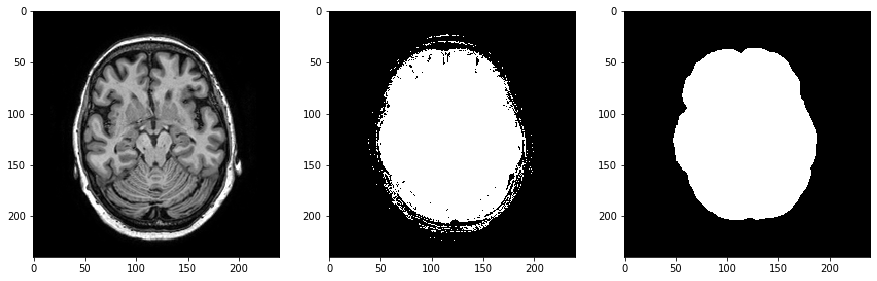

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import nn_classifier_test_brains

nn_classifier_test_brains()

### QUESTION:
What % of pixels are classified incorrectly? Run the code a few times, because of the data sampling you will get slightly different errors. Your answer to this question will probably be different from other groups, depending on the type of features you have previously implemented in the `extract_features` function.

### (B)
### QUESTION:
Now we know, from the classification error, how many pixels are predicted to be in the wrong class. The generated images also show what the classification results look like. This visualization was created by transforming the vector of predicted labels back into an image using `np.reshape()`. We have also loaded the ground truth mask in order to compare the result.

How would you describe the predicted mask? What kind of pixels are often classified incorrectly and why?

### (C)
Implement the missing functionality in `dice_overlap()` in `# SECTION 1` of the `segmentation.py` module and evaluate it on your segmentation. If you have a low classification error, you should have quite a high Dice score.

In [12]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import nn_classifier_test_brains

nn_classifier_test_brains(testDice=True)

Error:
0.0359375
Dice coefficient:
0.944693812119269


### (D)
### QUESTION:
Can you think of an image where the error would be low, but the Dice score would be low, instead of high? If this is difficult to answer, try experimenting with different 10x1 vectors predicted labels and test labels that you fill in by hand, and vary the total number of zeros and ones in each vector.

## 1.7. k - Nearest Neighbor

### (A)
### EXERCISE:
Add the functionality below to `knn_classifier()`, which is similar to `nn_classifier()` but includes an additional input `k`. Instead of finding only the minimum distance using `scipy.spatial.distance.cdist()` and `np.argmin()`, you now need to find `k` minimum distances, then make `k` predictions for the labels, and then combine the `k` predictions into a final label. The code for this is already given below (so you just need to copy+paste it):

```python
sort_ix = np.argsort(D, axis=1)
sort_ix_k = sort_ix[:,:k] # Get the k smallest distances
predicted_labels = train_labels[sort_ix_k]
predicted_labels = scipy.stats.mode(predicted_labels, axis=1)
```
You can find `knn_classifier()` in `# SECTION 1` of the `segmentation.py` module.

### QUESTION:
To make sure you understand the code, assume that you have a training set of 10 samples, a test set of 5 samples, and you are using a 3-nearest neighbor classifier. What are the dimensions of the variables `sort_ix`, `sort_ix_k`, `predicted_labels_k` and `predicted_labels`?

### (B)
### EXERCISE:
Load your brain/not brain datasets for two different subjects (one subject for training, another one for testing). Subsample the training set to 100 samples. Look at the code in `knn_curve()` in `# SECTION 1` of the `segmentation_tests.py` module, modify the values of `k`, and test the code several times. Note that to save time, the ***scikit-learn*** implementation of k-NN could be used.

k = 1, iter = 0
k = 1, iter = 1
k = 1, iter = 2
k = 3, iter = 0
k = 3, iter = 1
k = 3, iter = 2
k = 5, iter = 0
k = 5, iter = 1
k = 5, iter = 2
k = 9, iter = 0
k = 9, iter = 1
k = 9, iter = 2
k = 15, iter = 0
k = 15, iter = 1
k = 15, iter = 2
k = 25, iter = 0
k = 25, iter = 1
k = 25, iter = 2
k = 100, iter = 0
k = 100, iter = 1
k = 100, iter = 2


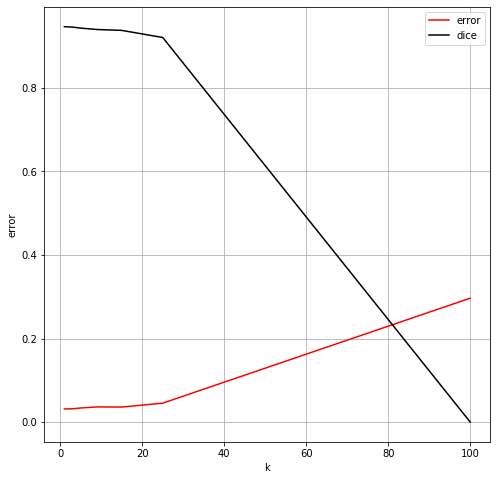

In [13]:
%matplotlib inline
import sys
sys.path.append("../code")
from segmentation_tests import knn_curve

knn_curve()

### QUESTION:
Describe in your own words what the code does.

### (C)
### QUESTION:
What would you say is a good value of k? You might want to repeat the above a few times to get a better estimate of the performance. How could you estimate the error at k = 100, without evaluating the classifier? Does a lower error always equal to higher Dice (and vice versa)?